<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [4]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [5]:
import numpy as np
np.dot(x1, x2)        #Скалярное произведение векторов

234704.86490859918

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

CRIME: уровень преступности на душу населения по городам.

ZN: доля жилой земли, зонированной для участков более 25 000 кв. Футов.

ИНДУС: доля нерелевантных бизнес-акров на город

CHAS: фиктивная переменная Чарльз-Ривер (= 1, если тракт ограничивает реку; 0 в противном случае).

NOX: концентрация оксидов азота (частей на 10 миллионов).

РМ: среднее количество комнат на одно жилище.

ВОЗРАСТ: доля домовладельцев, построенных до 1940 года.

DIS: взвешенные расстояния до пяти бостонских центров занятости.

РАД: индекс доступности к радиальным магистралям.

НАЛОГ: полная стоимость налога на недвижимость за 10 000 долларов США.

ПТРАТИО: соотношение учеников и учителей по городам.

B: 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.

LSTAT:% ниже статуса населения.

MEDV: средняя стоимость домов, занимаемых владельцами, в 1000 долларов.


In [7]:
import pandas as pd
boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df_3 = boston_df[[7, 8, 9]]
boston_df_3.columns = ["DIS", "RAD", "TAX"]
boston_df_3.head()

,DIS,RAD,TAX
0,4.0900,1.0,296.0
1,4.9671,2.0,242.0
2,4.9671,2.0,242.0
3,6.0622,3.0,222.0
4,6.0622,3.0,222.0


In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

DIS = boston_df_3["DIS"][[0,1]]
RAD = boston_df_3["RAD"][[0,1]]
TAX = boston_df_3["TAX"][[0,1]]

ax.scatter(DIS, RAD, TAX)
ax.set_xlabel('Расстояние до пяти бостонских центров занятости')
ax.set_ylabel('Индекс доступности к радиальным магистралям')
ax.set_zlabel('Налог на недвижимость/$10 000')
plt.show()

<Figure size 1000x1000 with 1 Axes>

Найти косинус угла между векторами x1 и x2

In [10]:
home1 = boston_df.loc[0].tolist()
home2 = boston_df.loc[1].tolist()
#Cos угла между векторами в 13-мерном пространстве =
(np.dot(home1, home2) / (np.sqrt(np.dot(home1, home1)) * np.sqrt(np.dot(home2, home2))))

0.994296998616362

Найти расстояние между точками x1 и x2.

In [11]:
#Расстояние между векторами в 13-мерном пространстве =
for i in range(len(home1)):
    home1[i] = home1[i]-home2[i]
np.sqrt(np.dot(home1, home1))

58.955079696240766

In [12]:
home1 = boston_df_3.loc[0].tolist()
home2 = boston_df_3.loc[1].tolist()
#Расстояние между векторами в 3-мерном пространстве =
(np.dot(home1, home2) / (np.sqrt(np.dot(home1, home1)) * np.sqrt(np.dot(home2, home2))))

0.9999655890934802

In [13]:
for i in range(len(home1)):
    home1[i] = home1[i]-home2[i]
np.sqrt(np.dot(home1, home1))

54.01637996395168

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

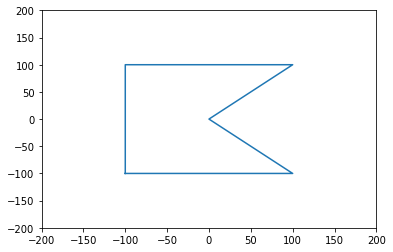

In [14]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [15]:
С = np.array(A) + [300,-200, 0]
С

array([[ 200, -300,    1],
       [ 200, -100,    1],
       [ 400, -100,    1],
       [ 300, -200,    1],
       [ 400, -300,    1],
       [ 200, -300,    1]])

(0, 400)

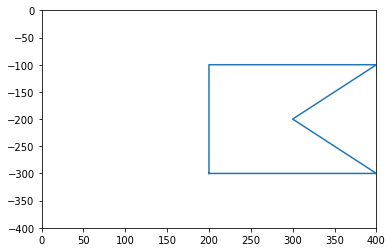

In [16]:
# С = np.array(С)
x = С[:,0]
y = С[:,1]
plt.plot(x, y)
plt.ylim([-400, 0])
plt.xlim([-0, 400])

Уменьшить объект в два раза.

In [17]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

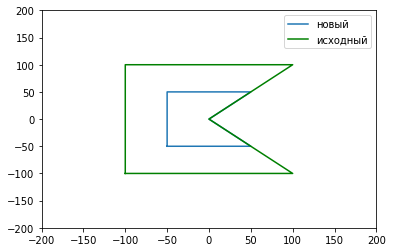

In [18]:
B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)

x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Повернуть на 130 градусов.

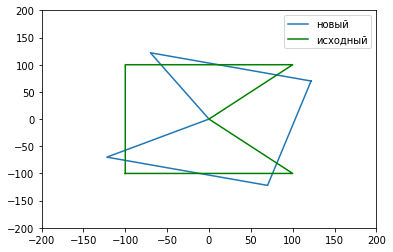

In [45]:
from math import cos, sin, pi

theta = (-130) * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)


x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])


**НЕ поняла, почему поворот идет так странно.**

**Фигура находится по центру, выравнивать ее не надо, но никак не поняла зависимость поворота от значения theta... ставлю например 1 градус, а поворот намного сильнее...**

Отразить объект относительно прямой y=x

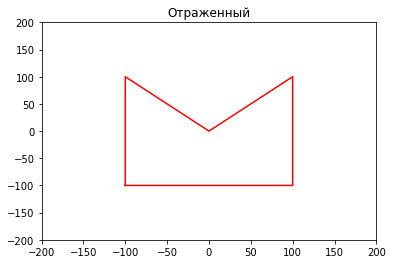

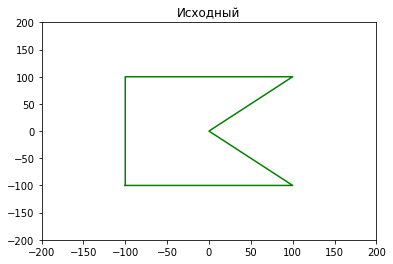

In [52]:
TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)


x = B[:,0]
y = B[:,1]
plt.plot(x, y, color = "r")
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.title("Отраженный")
plt.show()
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.title("Исходный")
plt.show()
#plt.legend(['новый', 'исходный'])